In [39]:
import optuna
import matplotlib.pyplot as plt
import numpy as np

studies_info = [
    {"name": "mpc_study_test", "db": "sqlite:///./study_traj_20.db", "label": "Trajectory 20 old"},

    {"name": "mpc_study_test", "db": "sqlite:///./study_traj_20_corrected.db", "label": "Trajectory 20"},
    {"name": "mpc_study_test", "db": "sqlite:///./study_traj_22_corrected.db", "label": "Trajectory 22"},
    {"name": "mpc_study_test", "db": "sqlite:///./study_traj_111_corrected.db", "label": "Trajectory 111"},
]

/tmp/ipykernel_14261/3192400969.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(studies_info))


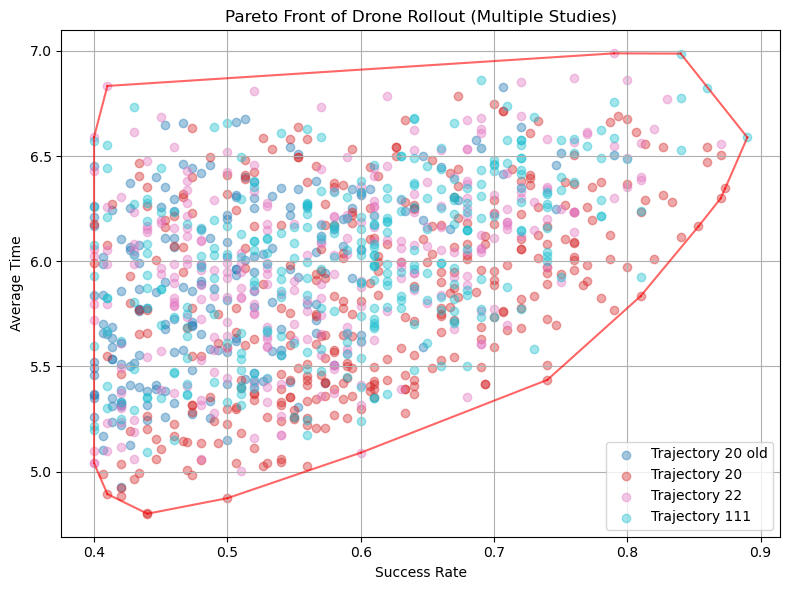

In [41]:
colors = plt.cm.get_cmap("tab10", len(studies_info))

plt.figure(figsize=(8, 6))
all_points = []
for idx, info in enumerate(studies_info):
    study = optuna.load_study(study_name=info["name"], storage=info["db"])
    points = []
    for trial in study.trials:
        if trial.values is not None and len(trial.values) >= 2:
            success_rate = trial.values[0]
            if success_rate < 0.4:
                continue
            avg_time = trial.values[1]
            points.append((success_rate, avg_time))
            all_points.append((success_rate, avg_time))
    if points:
        points = np.array(points)
        plt.scatter(points[:, 0], points[:, 1], alpha=0.4, label=info["label"], color=colors(idx))
from scipy.spatial import ConvexHull

if len(all_points) > 2:
    all_points = np.array(all_points)
    hull = ConvexHull(all_points)
    for simplex in hull.simplices:
        plt.plot(all_points[simplex, 0], all_points[simplex, 1], '-', color='red', alpha=0.6)

plt.xlabel("Success Rate")
plt.ylabel("Average Time")
plt.title("Pareto Front of Drone Rollout (Multiple Studies)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()